In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense # every layer in the current layer is connected to preceeding layers
from keras.optimizers import Adam # batched/stochastic gradient descent
%matplotlib inline

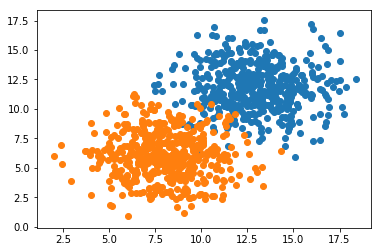

In [12]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [13]:
# create and train model
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(
    x=X,            # data set
    y=y,            # labels
    verbose=0,      # show debug
    batch_size=50,  # batch size
    epochs=100,     # number of times to iterate through data set
    shuffle='true'  # avoid local minimums
)

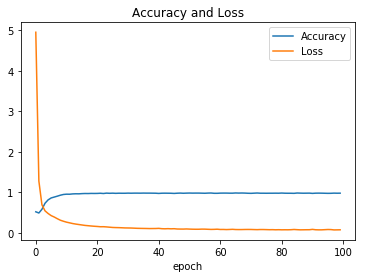

In [14]:
# plot results
plt.plot(h.history['accuracy'])
plt.plot(h.history['loss'])

plt.xlabel('epoch')
plt.title('Accuracy and Loss')
plt.legend(['Accuracy', 'Loss'])

In [15]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()

    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

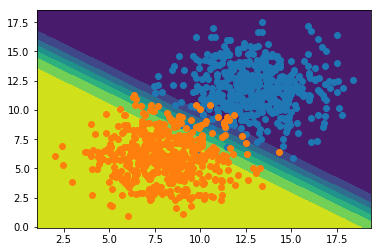

In [16]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

('Prediction is:', array([[0.618054]], dtype=float32))


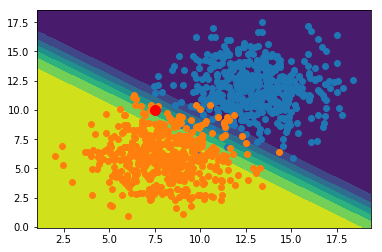

In [24]:

plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 10
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')

print("Prediction is:", prediction)